In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/dataset.csv")

# Display basic info
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

#  Handle missing values (if any)
df = df.dropna()

#  Separate categorical and numerical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = [col for col in df.columns if col not in categorical_cols + ['target']]

#  Encode categorical variables (using LabelEncoder or OneHotEncoder)
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Scale numerical features
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Final feature set and target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

print("\nPreprocessed feature shape:", X.shape)


Shape of dataset: (303, 14)

First 5 rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Preprocessed feature shape: (303, 30)


In [2]:
from sklearn.model_selection import train_test_split

# Split dataset: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
"""
Training set: 212 samples

Test set: 91 samples

Features: 30 (after encoding and scaling)
"""


((212, 30), (91, 30), (212,), (91,))

In [3]:
"""
###  Train a Random Forest Classifier
**Specifications:**
- 100 trees (`n_estimators=100`)
- Max depth of 10 (`max_depth=10`)
- Use default for other hyperparameters
"""
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

y_pred[:5]  # Show first 5 predictions as a sample



array([1, 1, 0, 0, 1])

In [4]:
"""
### Q4. Evaluate the model

We'll compute:
- Accuracy
- Precision
- Recall
- F1 Score
"""
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7912087912087912
Precision: 0.7719298245614035
Recall: 0.88
F1 Score: 0.822429906542056


###  Completed: Model Evaluation**

Here are your evaluation metrics:

| Metric     | Value     |
|------------|-----------|
| Accuracy   | **79.1%** |
| Precision  | **77.2%** |
| Recall     | **88.0%** |
| F1 Score   | **82.2%** |

###  Quick Interpretation:
- **High recall**: Great at identifying patients with heart disease.
- **Precision slightly lower**: A few false positives exist, but not excessive.
- **F1 Score**: Balanced performance between precision and recall — overall, your model is performing well!

---

### Q5. Feature Importance & Bar Chart

We’ll:
1. Extract feature importances from the Random Forest model.
2. Show the **top 5 most important features**.
3. Plot them using a bar chart.

   Feature  Importance
0     cp_0    0.113451
1   thal_2    0.104556
2  oldpeak    0.100531
3  thalach    0.097991
4   thal_3    0.071063


<ipython-input-5-07b3d799dda3>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_features, x='Importance', y='Feature', palette='viridis')


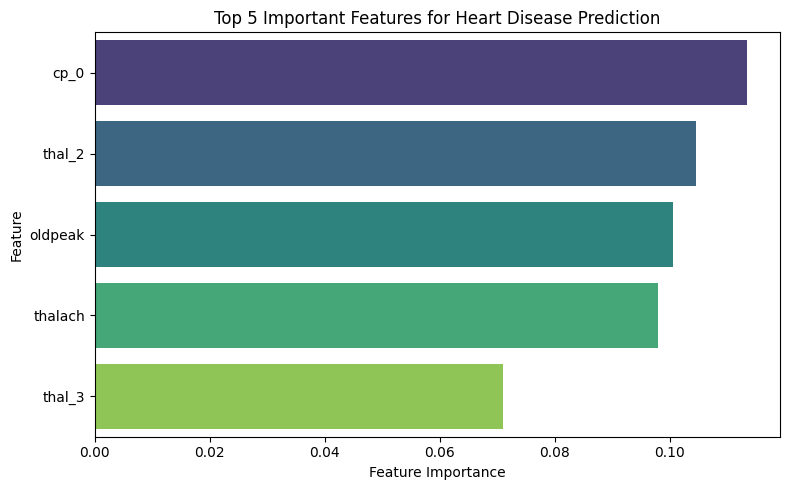

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Get top 5
top5_features = feat_imp_df.head(5)
print(top5_features)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=top5_features, x='Importance', y='Feature', palette='viridis')
plt.title('Top 5 Important Features for Heart Disease Prediction')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Top 5 Important Features**

| Rank | Feature   | Description                              | Importance |
|------|-----------|------------------------------------------|------------|
| 1    | `cp_0`     | Chest pain type: typical angina          | **0.113**  |
| 2    | `thal_2`   | Thalassemia: fixed defect                | **0.105**  |
| 3    | `oldpeak`  | ST depression (exercise-induced)         | **0.101**  |
| 4    | `thalach`  | Max heart rate achieved                  | **0.098**  |
| 5    | `thal_3`   | Thalassemia: reversible defect           | **0.071**  |

---

###  Quick Interpretation:

- **Chest pain type (`cp_0`)** is a strong predictor. People with typical angina may be at lower risk.
- **Thalassemia results (`thal_2` and `thal_3`)** show up twice — abnormal blood flow patterns are strong indicators.
- **`oldpeak` and `thalach`** are both exercise-related heart response measures — crucial for diagnosing heart conditions.

---

###  Q6. Hyperparameter tuning using GridSearchCV (5-fold)

We'll tune:
- `n_estimators` (number of trees)
- `max_depth`
- `min_samples_split`
- `min_samples_leaf`

In [6]:
# Q6
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Setup GridSearch with 5-fold CV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
              precision    recall  f1-score   support

           0       0.84      0.66      0.74        41
           1       0.76      0.90      0.83        50

    accuracy                           0.79        91
   macro avg       0.80      0.78      0.78        91
weighted avg       0.80      0.79      0.79        91



In [7]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming y_test is the true labels and y_pred is the predictions from the tuned model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))


Accuracy:  0.7912087912087912
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.68      0.75        41
           1       0.77      0.88      0.82        50

    accuracy                           0.79        91
   macro avg       0.80      0.78      0.78        91
weighted avg       0.80      0.79      0.79        91



In [8]:
from sklearn.ensemble import RandomForestClassifier

# Default model
default_model = RandomForestClassifier()
default_model.fit(X_train, y_train)
y_pred_default = default_model.predict(X_test)

# Performance metrics of the default model
print("Accuracy of Default Model: ", accuracy_score(y_test, y_pred_default))
print("Classification Report of Default Model: \n", classification_report(y_test, y_pred_default))


Accuracy of Default Model:  0.7692307692307693
Classification Report of Default Model: 
               precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.77      0.82      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.77        91
weighted avg       0.77      0.77      0.77        91

